In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
#import visuals as vs

In [2]:
%matplotlib inline

# Data Preprocessing

In [3]:
# Load the Boston housing dataset
USAhousing = pd.read_csv('USA_Housing.csv')

In [4]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
USAhousing.describe() 


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Exploratory Data Analysis

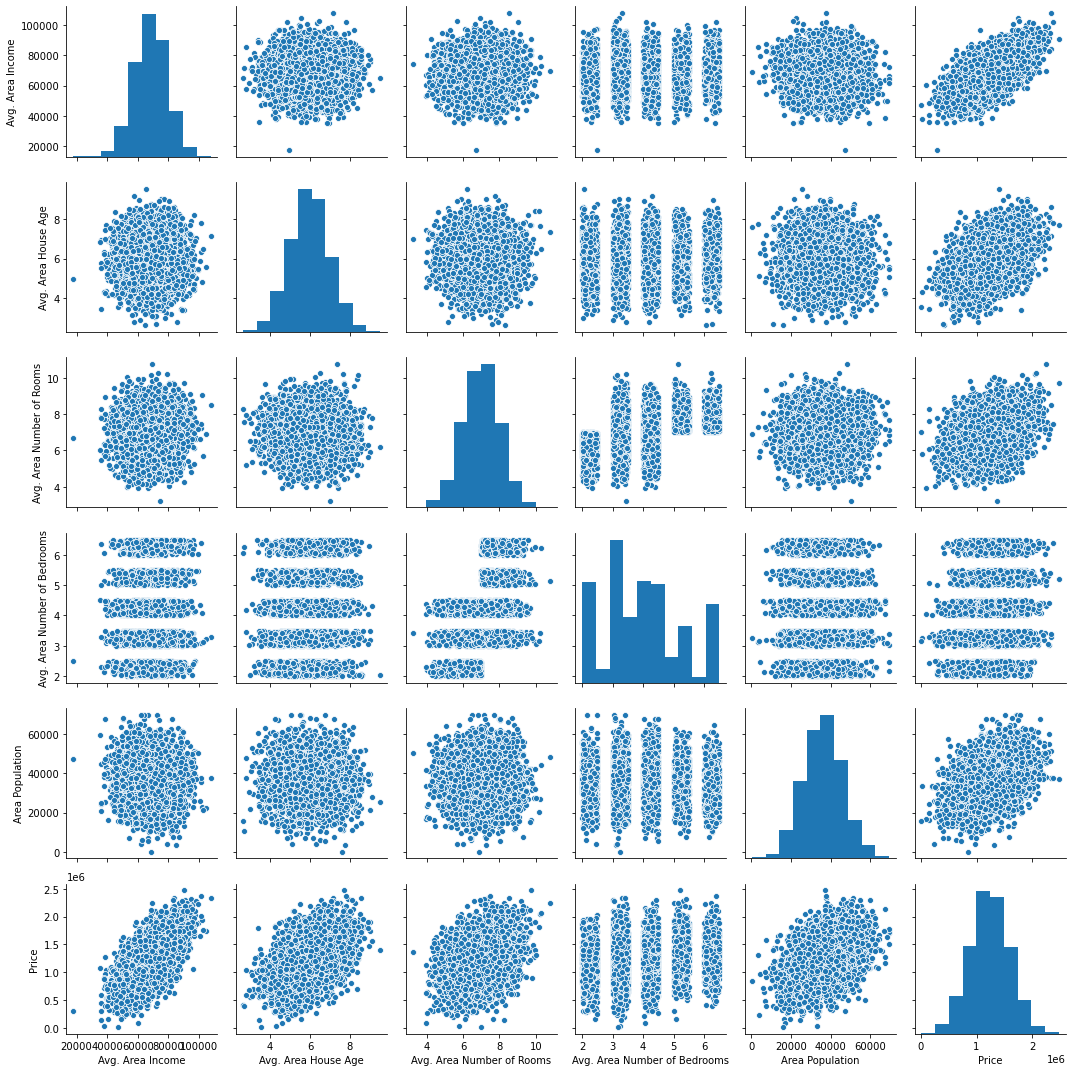

In [7]:
#It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers
sns.pairplot(USAhousing)
plt.tight_layout()
#We can spot a linear relationship between ‘Average area income’ and House prices ‘Price’. In addition, we can infer from the histogram that the ‘Price’
#variable seems to be normally distributed but contain several outliers.

In [8]:
# Load the Boston housing dataset
data = pd.read_csv('USA_Housing.csv')
prices = data['Price']
features = data.drop('Price', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 5000 data points with 7 variables each.


In [9]:
#Calculate Statistics

# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))


Statistics for Boston housing dataset:

Minimum price: $15938.657923287848
Maximum price: $2469065.5941747027
Mean price: $1232072.654142357
Median price $1232669.3779657914
Standard deviation of prices: $353082.3130526381


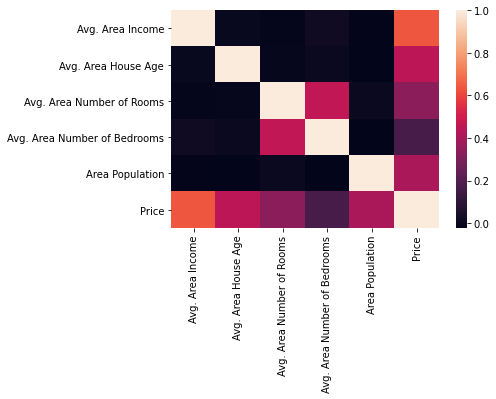

In [10]:
sns.heatmap(USAhousing.corr())

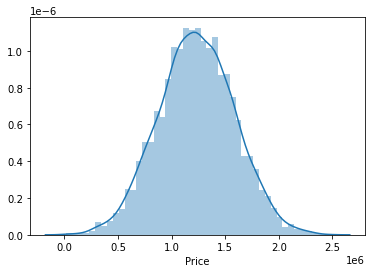

In [11]:
sns.distplot(USAhousing['Price'])

# splitting a data in train and test data

In [12]:
x = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y=USAhousing['Price']

In [13]:
#Train Test split'\
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

# Creating and traninig a model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
#Model evaluation
model = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [18]:
model

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


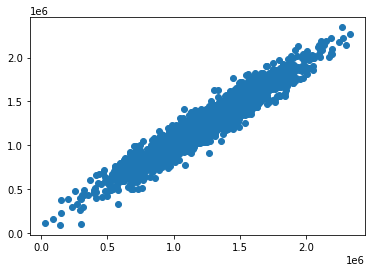

In [19]:
predict=lm.predict(X_test)
plt.scatter(y_test,predict)

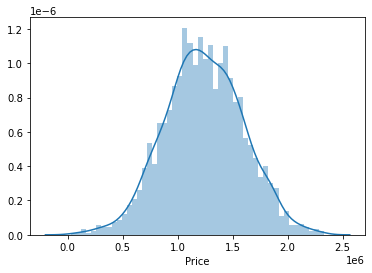

In [20]:
sns.distplot((y_test),bins=50);

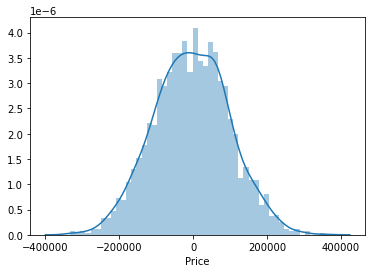

In [21]:
sns.distplot((y_test-predict),bins=50); 


# Model Performace Evaluation

In [22]:
from sklearn import metrics
print('MAE:' ,metrics.mean_absolute_error(y_test,predict))
print('MAE:' ,metrics.mean_squared_error(y_test,predict))
print('RMAE:' ,np.sqrt(metrics.mean_absolute_error(y_test,predict)))

MAE: 82288.22251914945
MAE: 10460958907.208984
RMAE: 286.85923816246435


# Buildnig a predictive model

In [27]:
input = [[80000,6.1,4.5,7.1,18888]]

# making prediction

prediction = lm.predict(input)
print("The new price of a house is {} $".format(prediction))



The new price of a house is [940570.4428407] $
